In [5]:
import xarray as xr
from kf_filter import KF

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
ds = xr.open_dataset('OLR.12hr_2yrs.wheeler.nc', decode_times=False).olr
kf = KF(ds, sampling_per_day=2)
kelvin = kf.kelvin_filter()
kelvin

<xarray.DataArray (time: 730, lat: 73, lon: 144)> Size: 61MB
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.45856414, -0.45500793, -0.45020605, ..., -0.43699574,
         -0.45163742, -0.45825075],
        [-0.09103605, -0.09382177, -0.09259579, ..., -0.03763289,
         -0.06522146, -0.08228533],
        ...,
        [ 1.88918767,  1.82453134,  1.77530966, ...,  1.86477773,
          1.93745685,  1.93746299],
        [ 0.85981532,  0.87213842,  0.87718172, ...,  0.80441825,
          0.82280095,  0.84230712],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.42545866, -0.43503414, -0.43908538, ..., -0.35077588,
         -0.38358646, -0.40857763],
        [-0.0485012 , -0.0731848 , -0.09117847, ...,  0.08107776,
          0.02788932, -0.01526395],
...
        [ 1.65124062,  1.62841362,  1.63747269, ...,  1.91051655,
          1.80286815,  1.71124001],
        [ 0.8899876 ,  0.84234219,  0.79261064, ...,  0.95424899,
          0.94929187,  0.92743315],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.44750852, -0.44019342, -0.43521276, ..., -0.46419239,
         -0.46197786, -0.45554923],
        [-0.06321408, -0.0607382 , -0.05972231, ..., -0.0613287 ,
         -0.06581342, -0.06559383],
        ...,
        [ 1.83552181,  1.77909772,  1.76476821, ...,  2.06760734,
          2.00668268,  1.91957182],
        [ 0.92541342,  0.91347358,  0.89041707, ...,  0.89315952,
          0.91231707,  0.92449486],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * lat      (lat) float32 292B -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float32 3kB 0.0 0.5 1.0 1.5 2.0 ... 363.0 363.5 364.0 364.5

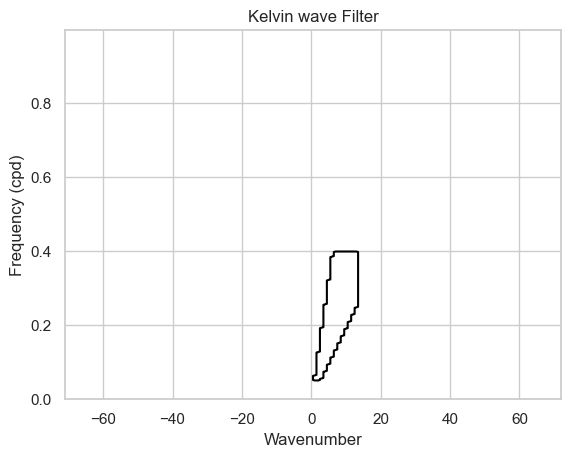

In [37]:
kf.visualize_filter('kelvin')

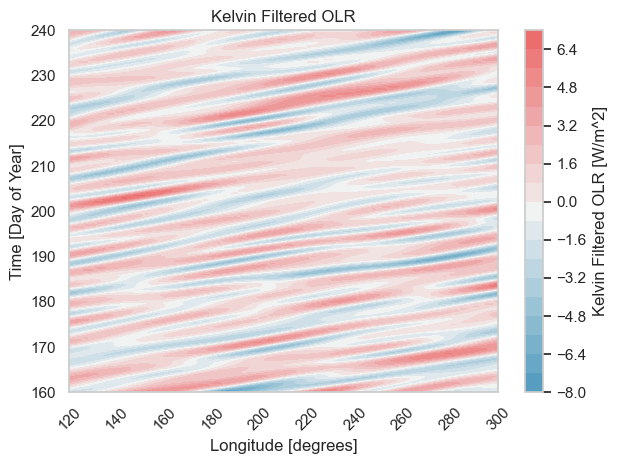

In [30]:
da_mean = kelvin.sel(lon=slice(120, 300), time=slice(160, 240)).mean(dim='lat')

plt.contourf(da_mean.lon, da_mean.time, da_mean, levels=20, cmap=sns.diverging_palette(230, 12, s=75, l=60, as_cmap=True))
plt.colorbar(label='Kelvin Filtered OLR [W/m^2]')
plt.title('Kelvin Filtered OLR')
plt.xlabel('Longitude [degrees]')
plt.ylabel('Time [Day of Year]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/kelvin_filtered_OLR.png', dpi=300)